<a href="https://colab.research.google.com/github/jamesnatoli/GradiantAnalysisNN/blob/main/Exercise_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise X: Gradient analysis of a neural network

You have already learnt to train a neural network and to evaluate its perfomance. In this exercise, you will analyze a neural network more closely. The output of the neural network is a function of the input quantities and Tensorflow enables you to derive gradients of it. The training algorithm uses gradients with respect to the NN parameters for given inputs defined by the training set. The other way round, we are going to derive gradients with respect to the input quantities for the given NN parameters determined by the training in order to get an idea how the NN output depends on the respective inputs and what their relevance is. It can also be understood as evaluating the leading orders of a Taylor Expansion of the NN output around the data points.

As you know already, you should usually get a basic overview of the input data before you apply multivariate analysis techniques. This is often limited by the complexity of the given data and advanced analysis techniques like the gradient analysis may help you to complete the picture. In this example however, the input data is of rather simple structure and we won't take a look at the beginning in order to pretend that it is more complex. We will make plots later on in order to verify the conclusions that we made from the gradient analysis.

The dataset contains two event classes (signal and background) that we want to optimally classify. There are three observables that can be use for this purpose.

To guide your own implementation of studies of the data-set, a code basis is provided in this jupyter notebook. Inspect it and use it as a starting point for your own work.

Import the packages needed for this exercise:

In [3]:
# Importing usual python packages
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [4]:
#%%capture output
# Importing ML related packages.
import tensorflow
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
!pip install np_utils
# from keras.utils import np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=9494935c370c9c9867568141facf5cdddc831551ccc1d8af448a2529386950b2
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [5]:
# check the tensorflow version we are using. Should be 2.2.0
print(tensorflow.__file__)
print(tensorflow.__version__)

/usr/local/lib/python3.10/dist-packages/tensorflow/__init__.py
2.15.0


Import the dataset. It consists of 10000 signal and background events respectively for the training. The same amount of events is available as test set. The first three columns contain the observables. The forth column contains the truth label (see mapping below).

In [7]:
# load data
data = np.loadtxt('events.data')
np.random.shuffle(data) # input data are sorted by class and Keras takes the last X% of the input data as validation set
data_variables = np.array(data[:, :3])
labels = data[:, 3]
bckgrd = labels==0
signal = labels==1
training_set = labels<2
bckgrd_test = labels==2
signal_test = labels==3
test_set = labels>=2

# Mention one-line sklearn function https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Exercise X.1: Training and retrieval of gradients (obligatory)
For this relatively simple training task we use a small NN as defined in the following. Run the training.

In [8]:
def train():
    # Select training data
    input_variables = data_variables[training_set]
    input_labels = labels[training_set]

    # Set up model
    model = Sequential()
    model.add(Dense(100, activation = 'tanh', input_dim = 3))
    model.add(Dense(1, activation = 'sigmoid'))

    # Define loss function, optimizer algorithm and validation metrics
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['acc'])

    # Print summary of the model
    model.summary()

    # Train model
    history = model.fit(input_variables, input_labels, batch_size=1024, epochs=50, validation_split=0.25)

    # Get training and validation loss/accuracy values from history
    loss_training = history.history['loss']
    loss_validation = history.history['val_loss']
    accuracy_training = history.history['acc']
    accuracy_validation = history.history['val_acc']

    # Plot the training and validation loss/accuracy vs the number of epochs
    plt.plot(accuracy_training, label="Acc")
    plt.plot(accuracy_validation, label="Validation Acc")
    plt.legend()
    plt.savefig('loss_vs_epochs.png')

    # Save model to file
    model.save('model.hd5')

    return

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 501 (1.96 KB)
Trainable params: 501 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
15/15 [==============================] - 1s 21ms/step - loss: 0.7592 - acc: 0.4741 - val_loss: 0.6952 - val_acc: 0.4952
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.6880 - acc: 0.5195 - val_loss: 0.6834 - val_acc: 0.5076
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.6714 - acc: 0.5915 - val_loss: 0.6625 - val_acc: 0.6496
Epoch 4/50
15/15 [=============

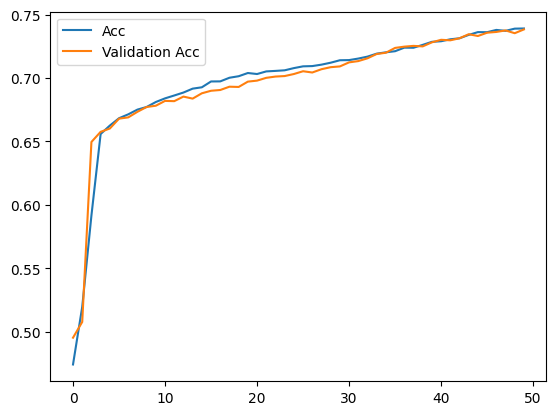

In [9]:
train()

Apply the NN to the test data and plot a histogram of the resulting distributions in order to get a visual impression of the output distributions:

In [10]:
def apply(events, modelfile='model.hd5'):
    # Load trained keras model
    model = load_model(modelfile)

    # Pass events through model
    predictions = model.predict(events)
    return predictions

1250/1250 [==============================] - 3s 2ms/step


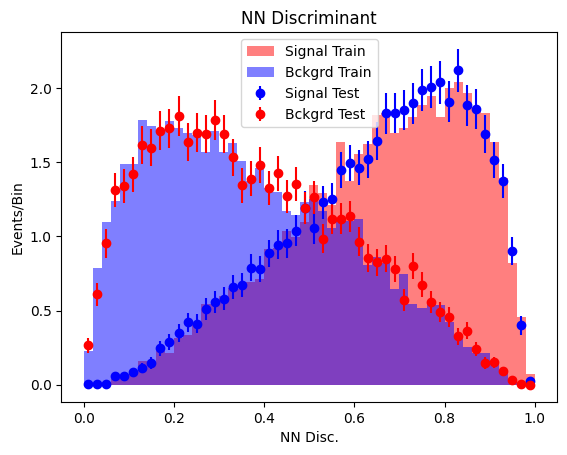

In [12]:
# TODO: add your code here
predictions = apply(data[:, :3])

# Get the bins
counts_signal_test, bins, _ = plt.hist(predictions[signal_test], bins=50, range=(0, 1), density=True)
counts_bckgrd_test, bins, _ = plt.hist(predictions[bckgrd_test], bins=50, range=(0, 1), density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
plt.clf()

# Now plot the histograms
plt.hist(predictions[signal], histtype='stepfilled', color='red', label='Signal Train', bins=50, range=(0,1), density=True, alpha=0.5)
plt.hist(predictions[bckgrd], histtype='stepfilled', color='blue', label='Bckgrd Train', bins=50, range=(0,1), density=True, alpha=0.5)

# Plot the points with error bars
plt.errorbar( bin_centers, counts_signal_test, yerr=np.sqrt(counts_signal_test)*.1, fmt='o', color='blue', label='Signal Test')
plt.errorbar( bin_centers, counts_bckgrd_test, yerr=np.sqrt(counts_bckgrd_test)*.1, fmt='o', color='red', label='Bckgrd Test')

# Beautify
plt.title('NN Discriminant')
plt.xlabel('NN Disc.')
plt.ylabel('Events/Bin')
# plt.yscale('log')
plt.legend()

The following code shows you how the gradient can be retrieved with a tensorflow gradient tape. It tells tensorflow with respect to which parameters of the NN tensor the gradient shall be calculated (The input observables in this case).
With the given loop, the gradient will be evaluated at each data point of the test set and the mean result will be printed at the end. This tells you how the NN output responds on average to variations of the input observables. Run the code and get the mean gradient.

In [13]:
def get_gradients(sample, model):
    with tensorflow.GradientTape() as tape: #https://www.tensorflow.org/guide/advanced_autodiff#higher-order_gradients
        inputs = tensorflow.Variable([sample])
        tape.watch(inputs)
        output = model(inputs)
    g = tape.gradient(output, inputs)
    grads = g.numpy()[0]
    return grads # hint: you can return multiple objects at a time

In [15]:
model = load_model('model.hd5')
mean_grads = [0.0, 0.0, 0.0]
n_evts = len(data_variables[test_set])
fraction = 10 # run only every nth event for saving time
for n, sample in enumerate(data_variables[test_set]):
    if n%fraction!=0:
        continue
    grads = get_gradients(sample, model)
    for i in range(len(mean_grads)):
        mean_grads[i] += abs(grads[i])/n_evts*fraction
print(mean_grads)

[0.3810617682123561, 0.12025288305736483, 0.011864016870058546]


The mean gradient contains one component for each input observable.
- What does the result tell you?
- What is the drawback of this calculated mean gradient? How can it be improved? Only a small adaptation of the given code is necessary. Apply and rerun it.
- What additional information can you get from the new result?

You can also calculate higher derivatives with tensorflow. In order to go to the second order, you can encapsulate the present gradient tape with a second one and retrieve the jacobian matrix via `jacobian = tape2.jacobian(g, inputs).numpy()`. Note that the resulting numpy array will have effectively two dimensions but like for the gradient you need to call the zeroth component in between `jacobian[0][i][0][j]`. Calculate the second derivatives given by the diagonal elements. What do they tell you and how does that relate to the observation you made with the first order gradients?

Now it is time to verify your assumptions about the data distributions. Let's create a 3x3 matrix of plots of the three observables (marginal distributions on the diagonal, 2D scatter plots on the off-diagonal elements).

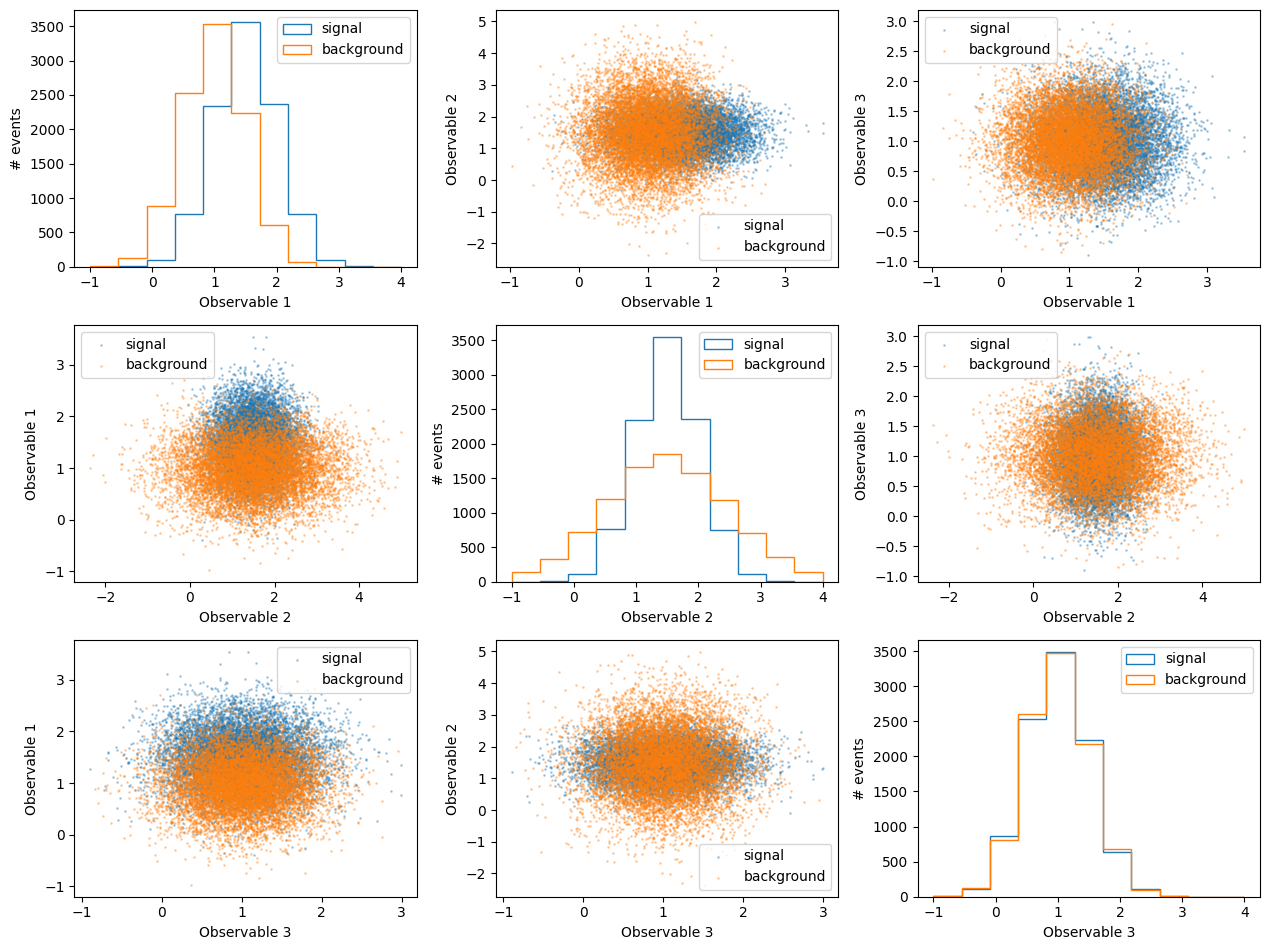

In [16]:
nvar = 3
f, axarr = plt.subplots(nvar, nvar, figsize=[12.8, 9.6])
nbins = 20
for i in range(nvar):
    for j in range(nvar):
        if i==j:
            axarr[i,j].hist(data[signal_test,i], histtype=u'step', bins=11, range=(-1,4), label="signal")
            axarr[i,j].hist(data[bckgrd_test,i], histtype=u'step', bins=11, range=(-1,4), label="background")
            axarr[i,j].legend()
            axarr[i,j].set_xlabel("Observable %i"%(i+1))
            axarr[i,j].set_ylabel("# events")
        else:
            axarr[i,j].scatter(data[signal_test,i],data[signal_test,j], s=1, alpha=0.3, label="signal")
            axarr[i,j].scatter(data[bckgrd_test,i],data[bckgrd_test,j], s=1, alpha=0.3, label="background")
            axarr[i,j].legend()
            axarr[i,j].set_xlabel("Observable %i"%(i+1))
            axarr[i,j].set_ylabel("Observable %i"%(j+1))
plt.tight_layout()
plt.show()

## Exercise X.2: ROC curves (obligatory)
In this part of the exercise, you will generate ROC curves in order to visualize the separation power of the single observables and the NN output. Finally, compare it to the information you retrieved with the gradient analysis.

The following function already provides the functionality to transform two histrograms (signal and background) handed over as a list of bin contents into ROC plots. Recall what it does and what a ROC curve shows.

In the second code block, define the histograms to be fed into the function for each of the observables and the NN output generating altogether four ROC curves. One example is already given. In one case, you will need to apply a simple transformation to the observable in order to get a sensible results. You can apply the necessary operations like `abs()+-*/` directly to the numpy array that holds the data.

In [17]:
def plot_ROC(y_sig, y_bkg, label):
    # Choose the direction of the discriminating varible such that AUC is > 50%
    mean = 0.0
    for i in range(len(y_sig)):
        mean += i * (y_sig[i] - y_bkg[i])
    if mean > 0.0:
        y_sig = y_sig[::-1] # reverse numpy array
        y_bkg = y_bkg[::-1] # reverse numpy array

    # Transform bin contents into lists off efficiencies
    sigeff = [0.0]
    bkgeff = [0.0]
    for y, eff in [[y_sig, sigeff], [y_bkg, bkgeff]]:
        for entry in y:
            eff.append(entry + eff[-1])
        for i, entry in enumerate(eff):
            eff[i] = entry / eff[-1]
    bkgrej=[]
    for entry in bkgeff:
        bkgrej.append(1.0 - entry)

    plt.plot(sigeff, bkgrej, label=label)

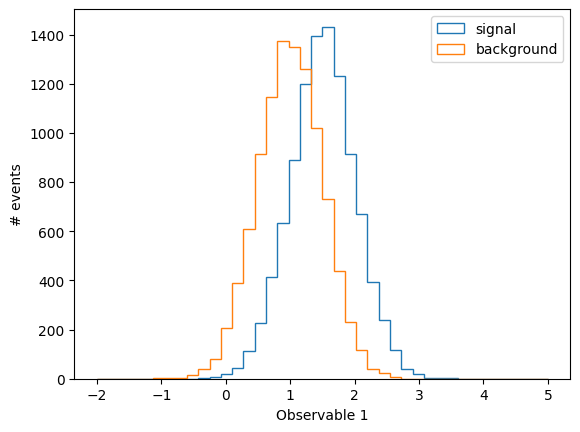

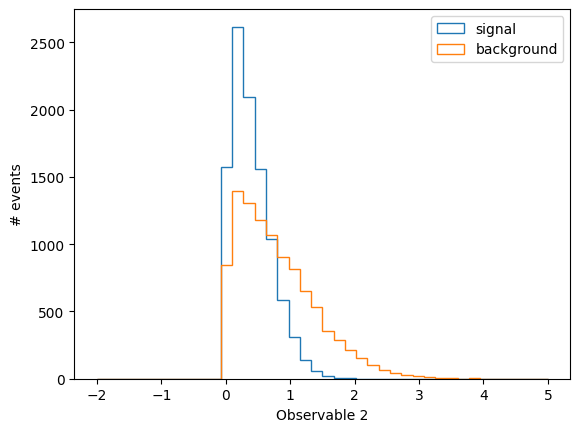

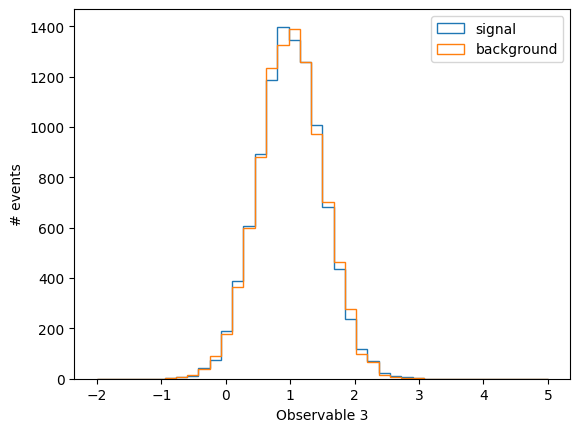

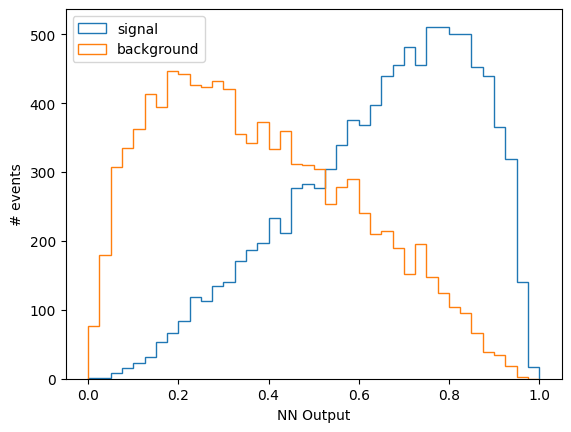

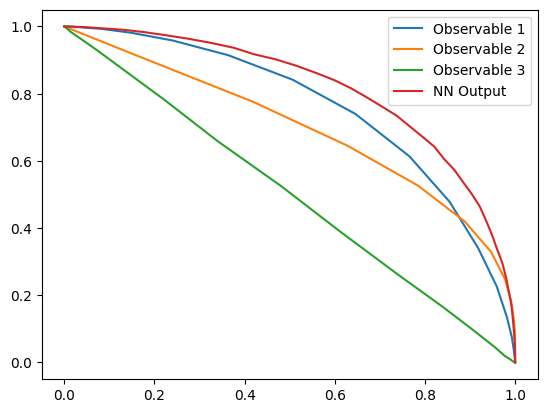

In [31]:
# Observable 1
y1sig, x1sig, p1sig = plt.hist(data[signal_test,0], histtype=u'step', bins=40, range=(-2,5), label="signal")
y1bkg, x1bkg, p1bkg = plt.hist(data[bckgrd_test,0], histtype=u'step', bins=40, range=(-2,5), label="background")
plt.legend()
plt.xlabel("Observable 1")
plt.ylabel("# events")
plt.show()

# Observable 2
# This variable is similar in Signal and Bckgrd, but we can transform it to get good discriminating power
# First subtract mean, then take abs() which helps to separate signal and bckgrd
y2sig, x2sig, p2sig = plt.hist(abs(data[signal_test,1]-1.5), histtype=u'step', bins=40, range=(-2,5), label="signal")
y2bkg, x2bkg, p2bkg = plt.hist(abs(data[bckgrd_test,1]-1.5), histtype=u'step', bins=40, range=(-2,5), label="background")
plt.legend()
plt.xlabel("Observable 2")
plt.ylabel("# events")
plt.show()

# Observable 3
# Signal and Bckgrd look ID for this variable, can't do anything
# Notice in ROC plot that it's useless...
y3sig, x3sig, p3sig = plt.hist(data[signal_test,2], histtype=u'step', bins=40, range=(-2,5), label="signal")
y3bkg, x3bkg, p3bkg = plt.hist(data[bckgrd_test,2], histtype=u'step', bins=40, range=(-2,5), label="background")
plt.legend()
plt.xlabel("Observable 3")
plt.ylabel("# events")
plt.show()

# NN Output
yNNsig, xNNsig, pNNsig = plt.hist(predictions[signal_test], histtype=u'step', bins=40, range=(0,1), label="signal")
yNNbkg, xNNbkg, pNNbkg = plt.hist(predictions[bckgrd_test], histtype=u'step', bins=40, range=(0,1), label="background")
plt.legend()
plt.xlabel("NN Output")
plt.ylabel("# events")
plt.show()

plot_ROC(y1sig, y1bkg, "Observable 1")
plot_ROC(y2sig, y2bkg, "Observable 2")
plot_ROC(y3sig, y3bkg, "Observable 3")
plot_ROC(yNNsig, yNNbkg, "NN Output")
plt.legend()
plt.show()

## Exercise X.3: Visualization of NN function and derivatives (obligatory)
You have probably found out that one observable does not contribute any separation power. Exclude it and repeat the training with only the two useful observables such that we can easily visualize the NN function and its dervatives as 2D heat maps.

In [32]:
def train_reduced():
    # Select labelled data
    input_variables_reduced = data_variables_reduced[training_set]
    input_labels = labels[training_set]

    # Set up model
    model = Sequential()
    model.add(Dense(100, activation = 'tanh', input_dim = 2))
    model.add(Dense(1, activation = 'sigmoid'))

    # Define loss function, optimizer algorithm and validation metrics
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['acc'])

    # Print summary of the model
    model.summary()

    # Train model
    history = model.fit(input_variables_reduced, input_labels, batch_size=1024, epochs=50, validation_split=0.25)

    # Get training and validation loss/accuracy values from history
    loss_training = history.history['loss']
    loss_validation = history.history['val_loss']
    accuracy_training = history.history['acc']
    accuracy_validation = history.history['val_acc']

    # Plot the training and validation loss/accuracy vs the number of epochs
    plt.plot(accuracy_training)
    plt.plot(accuracy_validation)
    plt.savefig('loss_vs_epochs.png')

    # Save model to file
    model.save('model_reduced.hd5')

    return

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               300       
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
15/15 [==============================] - 2s 22ms/step - loss: 0.6877 - acc: 0.4990 - val_loss: 0.6735 - val_acc: 0.5542
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.6604 - acc: 0.6401 - val_loss: 0.6503 - val_acc: 0.6616
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.6410 - acc: 0.6687 - val_loss: 0.6349 - val_acc: 0.6626
Epoch 4/50
15/15 [===========

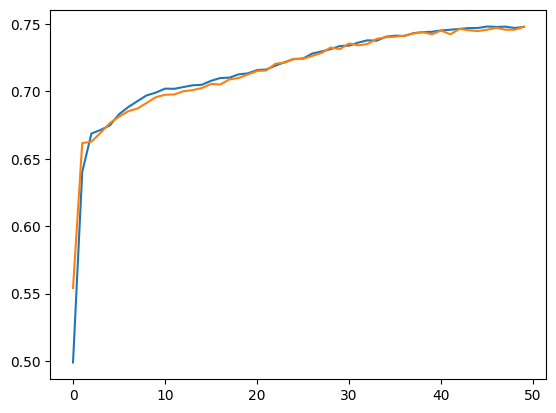

In [35]:
data_variables_reduced = np.array(data[:, :2])
train_reduced()

Run the following code snippets. They will produce heat maps of the NN output, first order gradients and the jacobian matrix. Inpect the results and understand them.

In [43]:
model = load_model('model_reduced.hd5')

# variables to store grids of quantities of interest
f = []
d1 = []
d2 = []
dd1 = []
dd2 = []
d1d2 = []

# loop through grid
for i in range(40):
    print(f'\ti -->{i}')

    # store lines as an intermediate step
    lf = []
    ld1 = []
    ld2 = []
    ldd1 = []
    ldd2 = []
    ld1d2 = []
    for j in range(40):
      print(f'\t j -->{j}', end='\r')
      point = np.array([5.-i/40.*7., j/40.*7.-2.]) #decreasing in i because of image coordinate system of imshow
      # Get 2nd Derivatives
      with tensorflow.GradientTape() as tape2:
        with tensorflow.GradientTape() as tape: #https://www.tensorflow.org/guide/advanced_autodiff#higher-order_gradients
          inputs = tensorflow.Variable([point])
          tape.watch(inputs)
          tape2.watch(inputs)
          output = model(inputs)
          g1 = tape.gradient(output, inputs)
        grads = g1.numpy()[0]
        grads2 = tape2.jacobian(g1, inputs).numpy()[0]

      lf.append(output.numpy()[0])
      ld1.append(grads[0])
      ld2.append(grads[1])
      ldd1.append(grads2[0][0][0])
      ldd2.append(grads2[1][0][1])
      ld1d2.append(grads2[1][0][0])
    f.append(lf)
    d1.append(ld1)
    d2.append(ld2)
    dd1.append(ldd1)
    dd2.append(ldd2)
    d1d2.append(ld1d2)

	i -->0
	i -->1
	i -->2
	i -->3
	i -->4
	i -->5
	i -->6
	i -->7
	i -->8
	i -->9
	i -->10
	i -->11
	i -->12
	i -->13
	i -->14
	i -->15
	i -->16
	i -->17
	i -->18
	i -->19
	i -->20
	i -->21
	i -->22
	i -->23
	i -->24
	i -->25
	i -->26
	i -->27
	i -->28
	i -->29
	i -->30
	i -->31
	i -->32
	i -->33
	i -->34
	i -->35
	i -->36
	i -->37
	i -->38
	i -->39


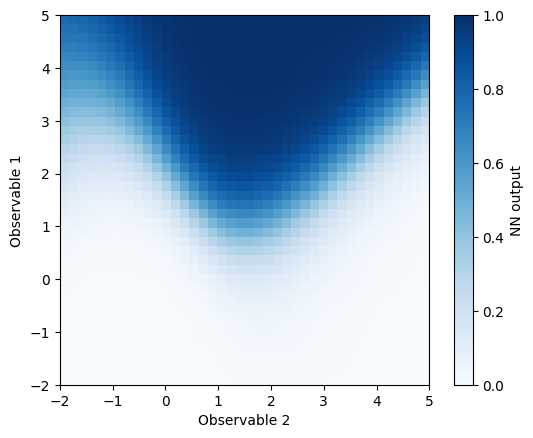

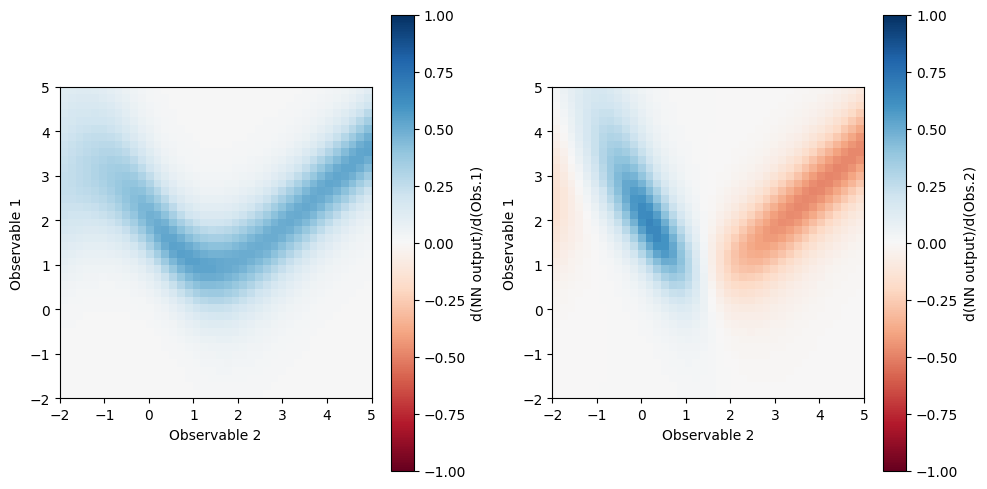

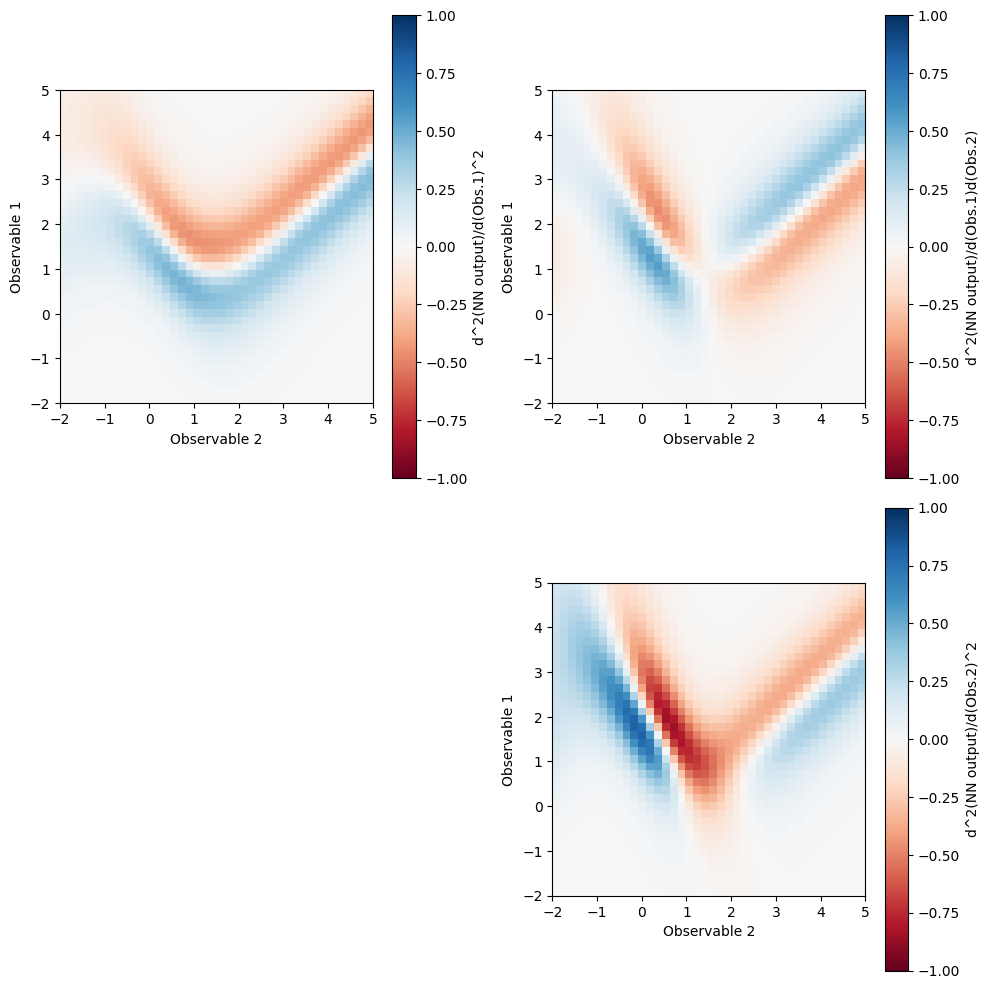

In [44]:
# plot NN output function
plt.imshow(f, extent=[-2,5,-2,5], cmap='Blues', vmin=0.0, vmax=1.0)
plt.xlabel("Observable 2")
plt.ylabel("Observable 1")
plt.colorbar(label="NN output")
plt.show()

# plot first derivatives
fig, axarr = plt.subplots(1, 2, figsize=[10, 5])
pcm = axarr[0].imshow(d1, extent=[-2,5,-2,5], cmap='RdBu', vmin=-1.0, vmax=1.0)
axarr[0].set_xlabel("Observable 2")
axarr[0].set_ylabel("Observable 1")
fig.colorbar(pcm, ax=axarr[0], label="d(NN output)/d(Obs.1)")
axarr[1].imshow(d2, extent=[-2,5,-2,5], cmap='RdBu', vmin=-1.0, vmax=1.0)
axarr[1].set_xlabel("Observable 2")
axarr[1].set_ylabel("Observable 1")
fig.colorbar(pcm, ax=axarr[1], label="d(NN output)/d(Obs.2)")
plt.tight_layout()
plt.show()

# plot second derivatives
fig, axarr = plt.subplots(2, 2, figsize=[10, 10])
pcm2 = axarr[0,0].imshow(dd1, extent=[-2,5,-2,5], cmap='RdBu', vmin=-1.0, vmax=1.0)
axarr[0,0].set_xlabel("Observable 2")
axarr[0,0].set_ylabel("Observable 1")
fig.colorbar(pcm2, ax=axarr[0,0], label="d^2(NN output)/d(Obs.1)^2")
axarr[0,1].imshow(d1d2, extent=[-2,5,-2,5], cmap='RdBu', vmin=-1.0, vmax=1.0)
axarr[0,1].set_xlabel("Observable 2")
axarr[0,1].set_ylabel("Observable 1")
fig.colorbar(pcm2, ax=axarr[0,1], label="d^2(NN output)/d(Obs.1)d(Obs.2)")
axarr[1,1].imshow(dd2, extent=[-2,5,-2,5], cmap='RdBu', vmin=-1.0, vmax=1.0)
axarr[1,1].set_xlabel("Observable 2")
axarr[1,1].set_ylabel("Observable 1")
fig.colorbar(pcm2, ax=axarr[1,1], label="d^2(NN output)/d(Obs.2)^2")
axarr[1,0].axis('off')
plt.tight_layout()
plt.show()

Finally, think about what impacts the gradient based key figures. In case of effects that deteriorate the interpretability, can you think of measures to mitigate these effects?